# Clustering
I create new dataset with the models. The dataset includes artist name, rank, future growth. Finally I recommend artists for our advertisement clients.

### Import Packages

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [2]:
with open('../data/final/rank_df.pickle', 'rb') as rank:
    rank_df = pickle.load(rank)
    rank.close()
with open('../data/final/future_growth.pickle', 'rb') as growth:
    growth_dict = pickle.load(growth)
    growth.close()

In [3]:
rank_df.head()

,Rank
Artist,
Post Malone,1
Ed Sheeran,2
Billie Eilish,3
Drake,4
Ariana Grande,5


### Create New Dataset

In [4]:
rank_df['Future Growth'] = growth_dict.values()

In [5]:
rank_df.head()

,Rank,Future Growth
Artist,,
Post Malone,1,0.153796
Ed Sheeran,2,-0.036148
Billie Eilish,3,3.318439
Drake,4,0.014655
Ariana Grande,5,1.241825


In [21]:
rank_df.loc['Lil Mosey']

Rank             96.000000
Future Growth     0.275643
Name: Lil Mosey, dtype: float64

### Outliers

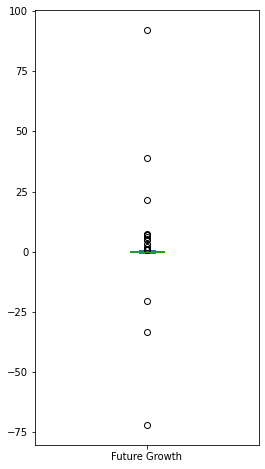

In [6]:
rank_df['Future Growth'].plot(kind='box', figsize=(4,8));

In [7]:
q1, q3 = np.percentile(rank_df['Future Growth'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
outliers = np.where((rank_df['Future Growth'] > upper_bound)|(rank_df['Future Growth'] < lower_bound))

In [8]:
outliers_df = rank_df.iloc[outliers]
artists_outliers = outliers_df.index

In [9]:
rank_df.drop(artists_outliers, inplace=True)

### Clustering

In [10]:
sc = MinMaxScaler()
rank_df.loc[:, ['Rank', 'Future Growth']] = sc.fit_transform(rank_df)

In [11]:
link = linkage(rank_df, method='ward')

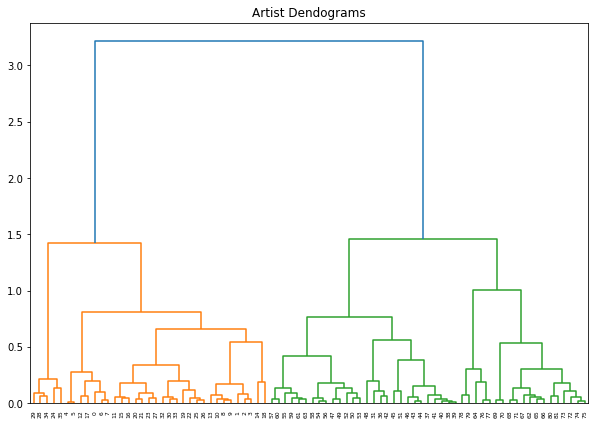

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Artist Dendograms")
dend = dendrogram(link)

In [13]:
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster.fit_predict(rank_df);

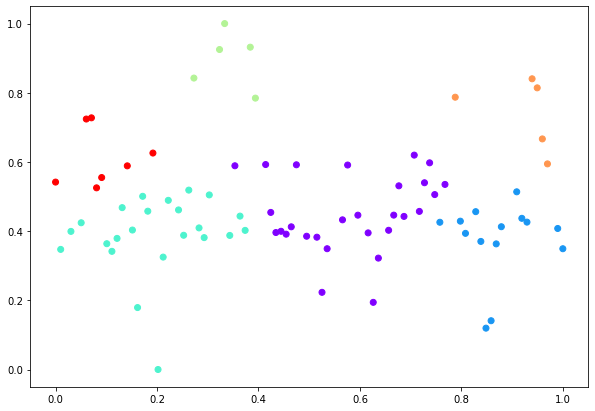

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(rank_df.iloc[:, 0], rank_df.iloc[:, 1], c=cluster.labels_, cmap='rainbow')

In [15]:
rank_df.iloc[:, 0:2] = sc.inverse_transform(rank_df)

In [16]:
rank_df['label'] = cluster.labels_

In [17]:
rank_df.groupby('label').mean()

,Rank,Future Growth
label,,
0,58.428571,0.065065
1,87.500000,-0.009393
2,20.695652,0.005791
3,34.800000,0.500323
4,92.200000,0.347846
5,10.000000,0.222892


In [18]:
rank_df.loc[rank_df.label == 3, :].index

Index(['Lady Gaga', 'Queen', 'Pop Smoke', 'KAROL G', 'BTS'], dtype='object', name='Artist')

In [19]:
rank_df.loc[rank_df.label == 4, :].index

Index(['benny blanco', 'A Boogie Wit da Hoodie', 'SAINt JHN', 'Lil Mosey',
       'Tyga'],
      dtype='object', name='Artist')

In [20]:
rank_df.loc[rank_df.label == 5, :].index

Index(['Post Malone', 'Bad Bunny', 'Juice WRLD', 'Travis Scott', 'Dua Lipa',
       'Khalid', 'Marshmello'],
      dtype='object', name='Artist')

In [32]:
rank_df.loc[rank_df.label == 1].index

Index(['Logic', 'Jonas Blue', 'Hailee Steinfeld', 'Piso 21', 'Shakira',
       'Nio Garcia', 'Miley Cyrus', 'Major Lazer', 'French Montana',
       'Kodak Black', 'Alan Walker', 'Manuel Turizo', 'Danny Ocean',
       'Chris Brown'],
      dtype='object', name='Artist')

### Conclusion

Group 3: 'Lady Gaga', 'Queen', 'Pop Smoke', 'KAROL G', 'BTS'
       
Group 4: 'benny blanco', 'A Boogie Wit da Hoodie', 'SAINt JHN', 'Lil Mosey',
       'Tyga'

Group 5: 'Post Malone', 'Bad Bunny', 'Juice WRLD', 'Travis Scott', 'Dua Lipa',
       'Khalid', 'Marshmello'

Finally, I recommend 17 artists from top 100 artists.